In [ ]:
!pip install scikit-learn

In [154]:
import pandas as pd

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

import seaborn as sns
import matplotlib.pyplot as plt

In [107]:
data_model = pd.read_csv("./output/data_modelo.csv")
data_model.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [108]:
data_model.shape

(119390, 30)

In [109]:
# We have lots of object columns and we also have to analyze inter and floats in order to see if we migth make some conges to them
data_model.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
days_in_waiting_list              

In [110]:
perc_null_col = data_model.isnull().sum().apply(lambda x: x/data_model.shape[0]).sort_values(ascending=False)
perc_null_col

country                           0.004087
children                          0.000034
reservation_status_date           0.000000
reservation_status                0.000000
is_canceled                       0.000000
lead_time                         0.000000
arrival_date_year                 0.000000
arrival_date_month                0.000000
arrival_date_week_number          0.000000
arrival_date_day_of_month         0.000000
stays_in_weekend_nights           0.000000
stays_in_week_nights              0.000000
adults                            0.000000
babies                            0.000000
meal                              0.000000
market_segment                    0.000000
distribution_channel              0.000000
is_repeated_guest                 0.000000
previous_cancellations            0.000000
previous_bookings_not_canceled    0.000000
reserved_room_type                0.000000
assigned_room_type                0.000000
booking_changes                   0.000000
deposit_typ

In [111]:
# The amount of null rows are not relevant, just 488 from more than 100.000 rows, so we can drop them
data_model.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car

In [112]:
data_model.drop(data_model[data_model.country.isnull()].index, inplace = True)

In [113]:
data_model.drop(data_model[data_model.children.isnull()].index, inplace = True)

In [114]:
data_model.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [115]:
drop_cols = ["required_car_parking_spaces","reservation_status", "reservation_status_date", "previous_cancellations", "previous_bookings_not_canceled", "booking_changes", "days_in_waiting_list" ]
data_model = data_model.drop(drop_cols, axis =1)
data_model

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,country,market_segment,distribution_channel,is_repeated_guest,reserved_room_type,assigned_room_type,deposit_type,customer_type,adr,total_of_special_requests
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,PRT,Direct,Direct,0,C,C,No Deposit,Transient,0.00,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,PRT,Direct,Direct,0,C,C,No Deposit,Transient,0.00,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,GBR,Direct,Direct,0,A,C,No Deposit,Transient,75.00,0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,GBR,Corporate,Corporate,0,A,A,No Deposit,Transient,75.00,0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,GBR,Online TA,TA/TO,0,A,A,No Deposit,Transient,98.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,BEL,Offline TA/TO,TA/TO,0,A,A,No Deposit,Transient,96.14,0
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,FRA,Online TA,TA/TO,0,E,E,No Deposit,Transient,225.43,2
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,DEU,Online TA,TA/TO,0,D,D,No Deposit,Transient,157.71,4
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,GBR,Online TA,TA/TO,0,A,A,No Deposit,Transient,104.40,0


In [116]:
data_model.shape

(118898, 23)

In [117]:
data_number = data_model.select_dtypes(include="number")
data_number

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,adr,total_of_special_requests
0,0,342,2015,27,1,0,0,2,0.0,0,0,0.00,0
1,0,737,2015,27,1,0,0,2,0.0,0,0,0.00,0
2,0,7,2015,27,1,0,1,1,0.0,0,0,75.00,0
3,0,13,2015,27,1,0,1,1,0.0,0,0,75.00,0
4,0,14,2015,27,1,0,2,2,0.0,0,0,98.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2017,35,30,2,5,2,0.0,0,0,96.14,0
119386,0,102,2017,35,31,2,5,3,0.0,0,0,225.43,2
119387,0,34,2017,35,31,2,5,2,0.0,0,0,157.71,4
119388,0,109,2017,35,31,2,5,2,0.0,0,0,104.40,0


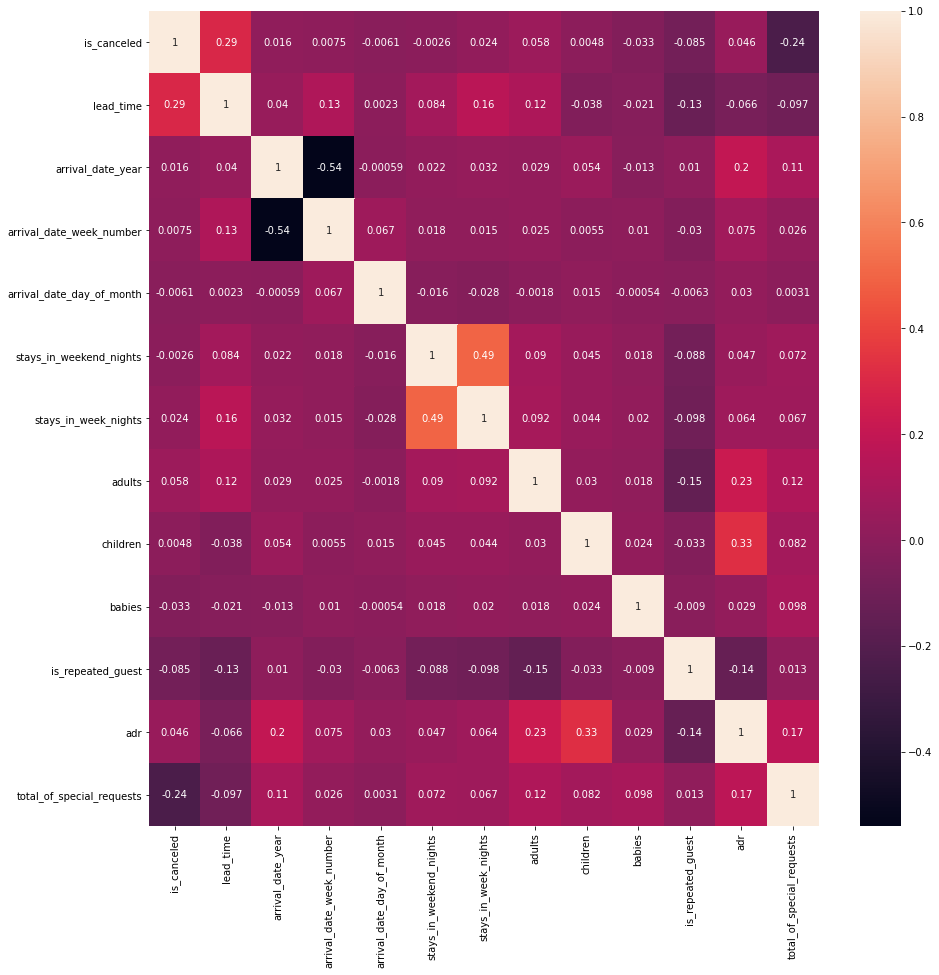

In [118]:
plt.figure(figsize=(15,15))
sns.heatmap(data_number.corr(), annot = True)
plt.show()

In [119]:
data_model.dtypes

hotel                         object
is_canceled                    int64
lead_time                      int64
arrival_date_year              int64
arrival_date_month            object
arrival_date_week_number       int64
arrival_date_day_of_month      int64
stays_in_weekend_nights        int64
stays_in_week_nights           int64
adults                         int64
children                     float64
babies                         int64
meal                          object
country                       object
market_segment                object
distribution_channel          object
is_repeated_guest              int64
reserved_room_type            object
assigned_room_type            object
deposit_type                  object
customer_type                 object
adr                          float64
total_of_special_requests      int64
dtype: object

In [120]:
data_model["hotel"].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [121]:
data_model["arrival_date_month"].unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [122]:
data_model["meal"].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [123]:
data_model["country"].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'ETH', 

In [124]:
data_model["market_segment"].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Aviation'], dtype=object)

In [125]:
data_model["distribution_channel"].unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [126]:
data_model["reserved_room_type"].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'B', 'P'], dtype=object)

In [127]:
data_model["assigned_room_type"].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'I', 'B', 'H', 'L', 'K', 'P'],
      dtype=object)

In [128]:
data_model["deposit_type"].unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

In [129]:
data_model["customer_type"].unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [130]:
le = preprocessing.LabelEncoder()

In [131]:
data_model["hotel"] = le.fit_transform(data_model["hotel"])
data_model.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,country,market_segment,distribution_channel,is_repeated_guest,reserved_room_type,assigned_room_type,deposit_type,customer_type,adr,total_of_special_requests
0,1,0,342,2015,July,27,1,0,0,2,...,PRT,Direct,Direct,0,C,C,No Deposit,Transient,0.0,0
1,1,0,737,2015,July,27,1,0,0,2,...,PRT,Direct,Direct,0,C,C,No Deposit,Transient,0.0,0
2,1,0,7,2015,July,27,1,0,1,1,...,GBR,Direct,Direct,0,A,C,No Deposit,Transient,75.0,0
3,1,0,13,2015,July,27,1,0,1,1,...,GBR,Corporate,Corporate,0,A,A,No Deposit,Transient,75.0,0
4,1,0,14,2015,July,27,1,0,2,2,...,GBR,Online TA,TA/TO,0,A,A,No Deposit,Transient,98.0,1


In [132]:
dic_month = {"January": 0,
             "February": 1,
             "March": 2,
             "April":3,
             "May":4,
             "June":5,
             "July":6,
             "August":7,
             "September":8,
             "October":9,
             "November":10,
             "December":11
               }


In [133]:
data_model["arrival_date_month"] = data_model["arrival_date_month"].map(dic_month)
data_model

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,country,market_segment,distribution_channel,is_repeated_guest,reserved_room_type,assigned_room_type,deposit_type,customer_type,adr,total_of_special_requests
0,1,0,342,2015,6,27,1,0,0,2,...,PRT,Direct,Direct,0,C,C,No Deposit,Transient,0.00,0
1,1,0,737,2015,6,27,1,0,0,2,...,PRT,Direct,Direct,0,C,C,No Deposit,Transient,0.00,0
2,1,0,7,2015,6,27,1,0,1,1,...,GBR,Direct,Direct,0,A,C,No Deposit,Transient,75.00,0
3,1,0,13,2015,6,27,1,0,1,1,...,GBR,Corporate,Corporate,0,A,A,No Deposit,Transient,75.00,0
4,1,0,14,2015,6,27,1,0,2,2,...,GBR,Online TA,TA/TO,0,A,A,No Deposit,Transient,98.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,0,23,2017,7,35,30,2,5,2,...,BEL,Offline TA/TO,TA/TO,0,A,A,No Deposit,Transient,96.14,0
119386,0,0,102,2017,7,35,31,2,5,3,...,FRA,Online TA,TA/TO,0,E,E,No Deposit,Transient,225.43,2
119387,0,0,34,2017,7,35,31,2,5,2,...,DEU,Online TA,TA/TO,0,D,D,No Deposit,Transient,157.71,4
119388,0,0,109,2017,7,35,31,2,5,2,...,GBR,Online TA,TA/TO,0,A,A,No Deposit,Transient,104.40,0


In [134]:
dic_meal = {"Undefined": 0,
             "SC": 1,
             "BB": 2,
             "HB":3,
             "FB":4
               }

In [135]:
data_model["meal"] = data_model["meal"].map(dic_meal)
data_model

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,country,market_segment,distribution_channel,is_repeated_guest,reserved_room_type,assigned_room_type,deposit_type,customer_type,adr,total_of_special_requests
0,1,0,342,2015,6,27,1,0,0,2,...,PRT,Direct,Direct,0,C,C,No Deposit,Transient,0.00,0
1,1,0,737,2015,6,27,1,0,0,2,...,PRT,Direct,Direct,0,C,C,No Deposit,Transient,0.00,0
2,1,0,7,2015,6,27,1,0,1,1,...,GBR,Direct,Direct,0,A,C,No Deposit,Transient,75.00,0
3,1,0,13,2015,6,27,1,0,1,1,...,GBR,Corporate,Corporate,0,A,A,No Deposit,Transient,75.00,0
4,1,0,14,2015,6,27,1,0,2,2,...,GBR,Online TA,TA/TO,0,A,A,No Deposit,Transient,98.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,0,23,2017,7,35,30,2,5,2,...,BEL,Offline TA/TO,TA/TO,0,A,A,No Deposit,Transient,96.14,0
119386,0,0,102,2017,7,35,31,2,5,3,...,FRA,Online TA,TA/TO,0,E,E,No Deposit,Transient,225.43,2
119387,0,0,34,2017,7,35,31,2,5,2,...,DEU,Online TA,TA/TO,0,D,D,No Deposit,Transient,157.71,4
119388,0,0,109,2017,7,35,31,2,5,2,...,GBR,Online TA,TA/TO,0,A,A,No Deposit,Transient,104.40,0


In [136]:
data_model["country"] = le.fit_transform(data_model["country"])
data_model.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,country,market_segment,distribution_channel,is_repeated_guest,reserved_room_type,assigned_room_type,deposit_type,customer_type,adr,total_of_special_requests
0,1,0,342,2015,6,27,1,0,0,2,...,135,Direct,Direct,0,C,C,No Deposit,Transient,0.0,0
1,1,0,737,2015,6,27,1,0,0,2,...,135,Direct,Direct,0,C,C,No Deposit,Transient,0.0,0
2,1,0,7,2015,6,27,1,0,1,1,...,59,Direct,Direct,0,A,C,No Deposit,Transient,75.0,0
3,1,0,13,2015,6,27,1,0,1,1,...,59,Corporate,Corporate,0,A,A,No Deposit,Transient,75.0,0
4,1,0,14,2015,6,27,1,0,2,2,...,59,Online TA,TA/TO,0,A,A,No Deposit,Transient,98.0,1


In [137]:
data_model.groupby('reserved_room_type', as_index=False)['adr'].mean()


,reserved_room_type,adr
0,A,90.972702
1,B,90.578528
2,C,160.388883
3,D,120.738291
4,E,124.636117
5,F,167.728308
6,G,176.245660
7,H,188.223111
8,L,124.666667
9,P,0.000000


<AxesSubplot:xlabel='reserved_room_type'>

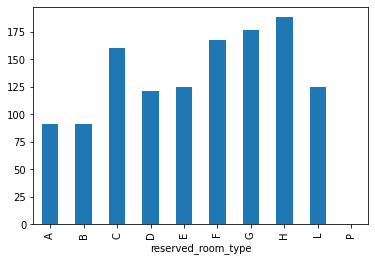

In [138]:
data_model.groupby('reserved_room_type')['adr'].mean().plot.bar()


In [139]:
data_model["market_segment"] = le.fit_transform(data_model["reserved_room_type"])
data_model["distribution_channel"] = le.fit_transform(data_model["reserved_room_type"])
data_model["reserved_room_type"] = le.fit_transform(data_model["reserved_room_type"])
data_model["assigned_room_type"] = le.fit_transform(data_model["assigned_room_type"])
data_model["deposit_type"] = le.fit_transform(data_model["deposit_type"])
data_model["customer_type"] = le.fit_transform(data_model["customer_type"])

In [140]:
data_model.dtypes

hotel                          int32
is_canceled                    int64
lead_time                      int64
arrival_date_year              int64
arrival_date_month             int64
arrival_date_week_number       int64
arrival_date_day_of_month      int64
stays_in_weekend_nights        int64
stays_in_week_nights           int64
adults                         int64
children                     float64
babies                         int64
meal                           int64
country                        int32
market_segment                 int32
distribution_channel           int32
is_repeated_guest              int64
reserved_room_type             int32
assigned_room_type             int32
deposit_type                   int32
customer_type                  int32
adr                          float64
total_of_special_requests      int64
dtype: object

In [141]:
data_model.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,country,market_segment,distribution_channel,is_repeated_guest,reserved_room_type,assigned_room_type,deposit_type,customer_type,adr,total_of_special_requests
0,1,0,342,2015,6,27,1,0,0,2,...,135,2,2,0,2,2,0,2,0.0,0
1,1,0,737,2015,6,27,1,0,0,2,...,135,2,2,0,2,2,0,2,0.0,0
2,1,0,7,2015,6,27,1,0,1,1,...,59,0,0,0,0,2,0,2,75.0,0
3,1,0,13,2015,6,27,1,0,1,1,...,59,0,0,0,0,0,0,2,75.0,0
4,1,0,14,2015,6,27,1,0,2,2,...,59,0,0,0,0,0,0,2,98.0,1


In [142]:
data_model.max()

hotel                           1.0
is_canceled                     1.0
lead_time                     737.0
arrival_date_year            2017.0
arrival_date_month             11.0
arrival_date_week_number       53.0
arrival_date_day_of_month      31.0
stays_in_weekend_nights        16.0
stays_in_week_nights           41.0
adults                         55.0
children                       10.0
babies                         10.0
meal                            4.0
country                       176.0
market_segment                  9.0
distribution_channel            9.0
is_repeated_guest               1.0
reserved_room_type              9.0
assigned_room_type             11.0
deposit_type                    2.0
customer_type                   3.0
adr                          5400.0
total_of_special_requests       5.0
dtype: float64

In [143]:
drop_cols = ["is_canceled", "is_repeated_guest","assigned_room_type"]
data_model = data_model.drop(drop_cols, axis =1)
data_model

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,adr,total_of_special_requests
0,1,342,2015,6,27,1,0,0,2,0.0,0,2,135,2,2,2,0,2,0.00,0
1,1,737,2015,6,27,1,0,0,2,0.0,0,2,135,2,2,2,0,2,0.00,0
2,1,7,2015,6,27,1,0,1,1,0.0,0,2,59,0,0,0,0,2,75.00,0
3,1,13,2015,6,27,1,0,1,1,0.0,0,2,59,0,0,0,0,2,75.00,0
4,1,14,2015,6,27,1,0,2,2,0.0,0,2,59,0,0,0,0,2,98.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2017,7,35,30,2,5,2,0.0,0,2,15,0,0,0,0,2,96.14,0
119386,0,102,2017,7,35,31,2,5,3,0.0,0,2,56,4,4,4,0,2,225.43,2
119387,0,34,2017,7,35,31,2,5,2,0.0,0,2,43,3,3,3,0,2,157.71,4
119388,0,109,2017,7,35,31,2,5,2,0.0,0,2,59,0,0,0,0,2,104.40,0


In [144]:
min_max = MinMaxScaler()

In [145]:
data_model["lead_time"] = min_max.fit_transform(data_model[["lead_time"]])
data_model["arrival_date_year"] = min_max.fit_transform(data_model[["arrival_date_year"]])
data_model["country"] = min_max.fit_transform(data_model[["country"]])

In [146]:
columnas_x = [a for a in (list(data_model.columns)) if a != "adr"]
columnas_x

['hotel',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'deposit_type',
 'customer_type',
 'total_of_special_requests']

In [147]:
X = data_model[columnas_x]
X.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,total_of_special_requests
0,1,0.464043,0.0,6,27,1,0,0,2,0.0,0,2,0.767045,2,2,2,0,2,0
1,1,1.000000,0.0,6,27,1,0,0,2,0.0,0,2,0.767045,2,2,2,0,2,0
2,1,0.009498,0.0,6,27,1,0,1,1,0.0,0,2,0.335227,0,0,0,0,2,0
3,1,0.017639,0.0,6,27,1,0,1,1,0.0,0,2,0.335227,0,0,0,0,2,0
4,1,0.018996,0.0,6,27,1,0,2,2,0.0,0,2,0.335227,0,0,0,0,2,1


In [148]:
y = data_model.adr
y.head()

0     0.0
1     0.0
2    75.0
3    75.0
4    98.0
Name: adr, dtype: float64

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [150]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor


In [151]:
models = { "ridge": Ridge(),
          "lasso": Lasso(),
          "sgd": SGDRegressor(),
          "knn": KNeighborsRegressor(),
          "gradient": GradientBoostingRegressor(),
          "rdm": RandomForestRegressor()
}

In [152]:
 for name, model in models.items():
        print(f"Entrenando modelo ---> {name}")
        model.fit(X_train,y_train)
        print(f"He acabado ;)")

Entrenando modelo ---> ridge
He acabado ;)
Entrenando modelo ---> lasso
He acabado ;)
Entrenando modelo ---> sgd
He acabado ;)
Entrenando modelo ---> knn
He acabado ;)
Entrenando modelo ---> gradient
He acabado ;)
Entrenando modelo ---> rdm
He acabado ;)


In [164]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"--------{name}--------")
    print("MAE: ", metrics.mean_absolute_error(y_test, y_pred))
    print("MSE: ", metrics.mean_squared_error(y_test,y_pred))
    print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
    print("R2: ", metrics.r2_score(y_test,y_pred))

    print("\n")


--------ridge--------
MAE:  27.254961216684194
MSE:  1423.3819882238013
RMSE:  37.727734999914865
R2:  0.38031225523242773


--------lasso--------
MAE:  28.405454550608862
MSE:  1500.0000588333805
RMSE:  38.729834221609835
R2:  0.3469555879587741


--------sgd--------
MAE:  27.367122531373052
MSE:  1462.9688274769967
RMSE:  38.248775502975214
R2:  0.3630776131319603


--------knn--------
MAE:  15.99454322960471
MSE:  698.3394682780489
RMSE:  26.426113378210744
R2:  0.695968886946905


--------gradient--------
MAE:  18.923450340575577
MSE:  725.596414924644
RMSE:  26.936896906003184
R2:  0.6841022229477658


--------rdm--------
MAE:  10.165876871525043
MSE:  366.59993528143906
RMSE:  19.146799609371772
R2:  0.8403959801332168


